<a href="https://colab.research.google.com/github/InsupCode/ML_Interpretability/blob/main/Doc_class_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
T_train = pd.read_csv("/content/Title_train_df.csv")
T_test = pd.read_csv("/content/Title_test_df.csv")

In [4]:
T_train.columns

Index(['pmid', 'cleaned_title', 'label', 'cleaned_title_tfidf_2019',
       'cleaned_title_tfidf_2019ncov', 'cleaned_title_tfidf_2020',
       'cleaned_title_tfidf_acute', 'cleaned_title_tfidf_air',
       'cleaned_title_tfidf_airborne', 'cleaned_title_tfidf_analysis',
       ...
       'cleaned_title_ngram_transmission covid19',
       'cleaned_title_ngram_transmission dynamics',
       'cleaned_title_ngram_transmission sarscov2',
       'cleaned_title_ngram_transmission severe',
       'cleaned_title_ngram_transmission severe acute',
       'cleaned_title_ngram_united states',
       'cleaned_title_ngram_vertical transmission',
       'cleaned_title_ngram_vertical transmission coronavirus',
       'cleaned_title_ngram_went press', 'cleaned_title_ngram_wuhan china'],
      dtype='object', length=206)

In [5]:
T_train.columns[:6]

Index(['pmid', 'cleaned_title', 'label', 'cleaned_title_tfidf_2019',
       'cleaned_title_tfidf_2019ncov', 'cleaned_title_tfidf_2020'],
      dtype='object')

## split data

In [13]:
X_train = T_train.drop(columns=['pmid', 'cleaned_title', 'label'])  # Replace 'target' with your actual target column name
X_train = X_train.select_dtypes(include=['number'])
y_train = T_train['label']

X_test = T_test.drop(columns=['pmid', 'cleaned_title', 'label'])
X_test = X_test.select_dtypes(include=['number'])
y_test = T_test['label']

In [14]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

### Model and training

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)

In [16]:
#Train
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8787878787878788

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.84      0.90      0.87        30

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



In [20]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nClass Mapping:", class_mapping)


Class Mapping: {'General Info': 0, 'Transmission': 1}


In [45]:
import pickle

In [46]:
#To save model:
# save the model as a pickle file
model_pkl_file = "Logistic_regression_Doc_classification.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

### data for explanation

In [24]:
X_test.head()

cleaned_title_tfidf_2019  cleaned_title_tfidf_2019ncov  \
0                       0.0                           0.0   
1                       0.0                           0.0   
2                       0.0                           0.0   
3                       0.0                           0.0   
4                       0.0                           0.0   

   cleaned_title_tfidf_2020  cleaned_title_tfidf_acute  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   cleaned_title_tfidf_air  cleaned_title_tfidf_airborne  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   

   cleaned_title_tfidf_analysis  cleaned_title_tfidf_antibody  \
0                      0.000000                           0.0   
1                      0.000000                           0.0   
2                      0.469988                           0.0   
3                      0.000000                           0.0   
4                      0.000000                           0.0   

   cleaned_title_tfidf_associated  cleaned_title_tfidf_association  ...  \
0                             0.0                              0.0  ...   
1                             0.0                              0.0  ...   
2                             0.0                              0.0  ...   
3                             0.0                              0.0  ...   
4                             0.0                              0.0  ...   

   cleaned_title_ngram_transmission covid19  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   cleaned_title_ngram_transmission dynamics  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   cleaned_title_ngram_transmission sarscov2  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   cleaned_title_ngram_transmission severe  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   cleaned_title_ngram_transmission severe acute  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   cleaned_title_ngram_united states  \
0                                0.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   

   cleaned_title_ngram_vertical transmission  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   cleaned_title_ngram_vertical transmission coronavirus  \
0                                          

In [26]:
y_test[:5]

array([0, 1, 0, 0, 0])

In [34]:
y_pred[:5]

array([0, 1, 1, 0, 0])

In [39]:
T_test["label"].head()

0    General Info
1    Transmission
2    General Info
3    General Info
4    General Info
Name: label, dtype: object

## Using Lime for Explanation

In [21]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=28618420efad6aeb6ccfd1e7b54c899973ee53025614cc0f64f59663539e0a55
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [22]:
import lime
import lime.lime_tabular
import numpy as np

In [35]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=X_train.columns,verbose=True,mode='classification')

### Correct prediction by model---Class predicted:General Info

In [36]:
exp = explainer.explain_instance(X_test.loc[0],model.predict_proba)

exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept 0.48963239647368406
Prediction_local [0.21751701]
Right: 0.09969747765340098


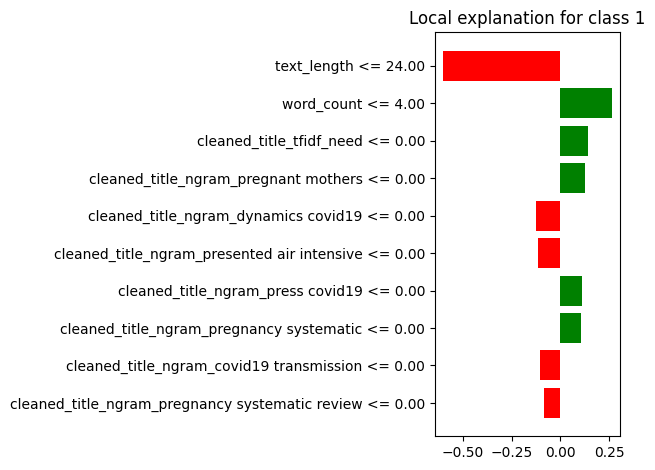

In [37]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure()
plt.tight_layout()

### Correct prediction by model--Class predicted:Transmission

In [40]:
exp = explainer.explain_instance(X_test.loc[1],model.predict_proba)

exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept 0.8012574815971067
Prediction_local [0.69723313]
Right: 0.7957324284888053


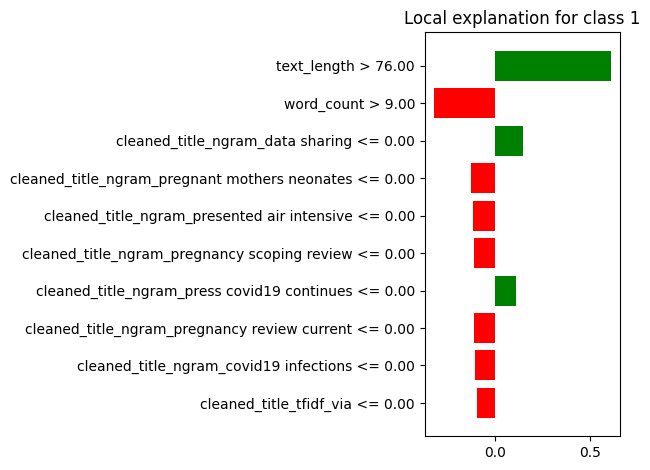

In [41]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure()
plt.tight_layout()

### Incorrect prediction by model

In [42]:
exp = explainer.explain_instance(X_test.loc[2],model.predict_proba)

exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept -0.018678976307651307
Prediction_local [0.96248882]
Right: 0.8671914299218318


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:427: FutureWarning: Series.__getitem__ treati

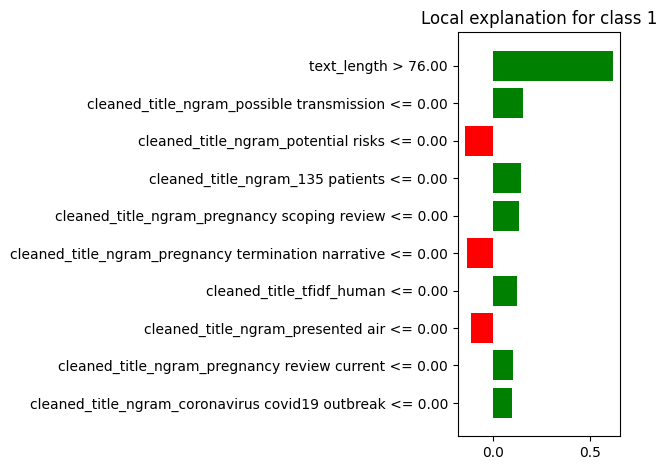

In [43]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure()
plt.tight_layout()

because it is giving more importance to text_length feature..and the text of this title is greater.Therefore the incorrect prediction

## Using SHAP for explanations

In [47]:
import shap

In [48]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

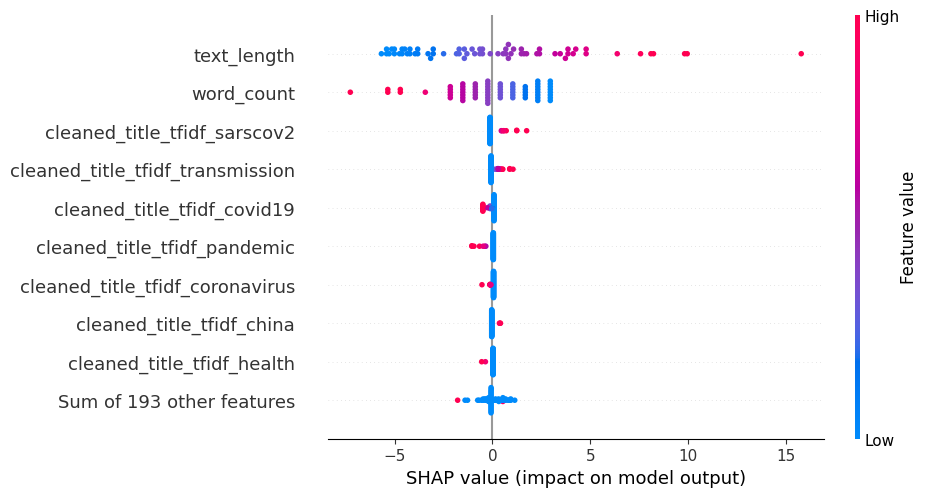

In [49]:
shap.initjs()
shap.plots.beeswarm(shap_values)

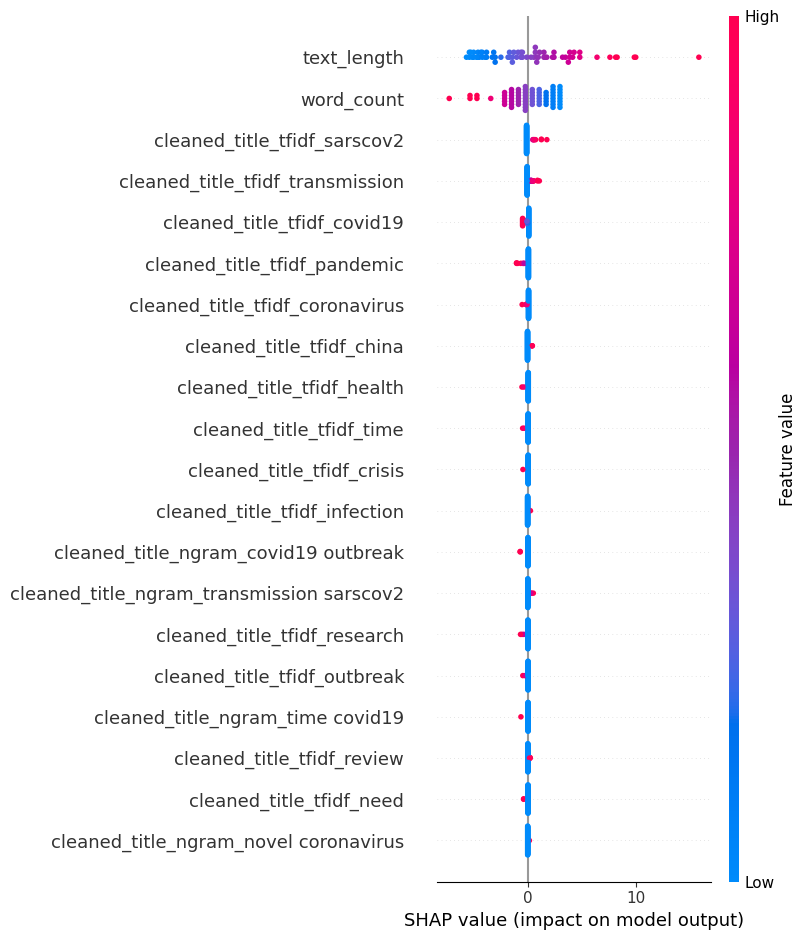

In [51]:
shap.initjs()

#A summary plot with the shapley value (feature importance)
shap.summary_plot(shap_values, X_test)

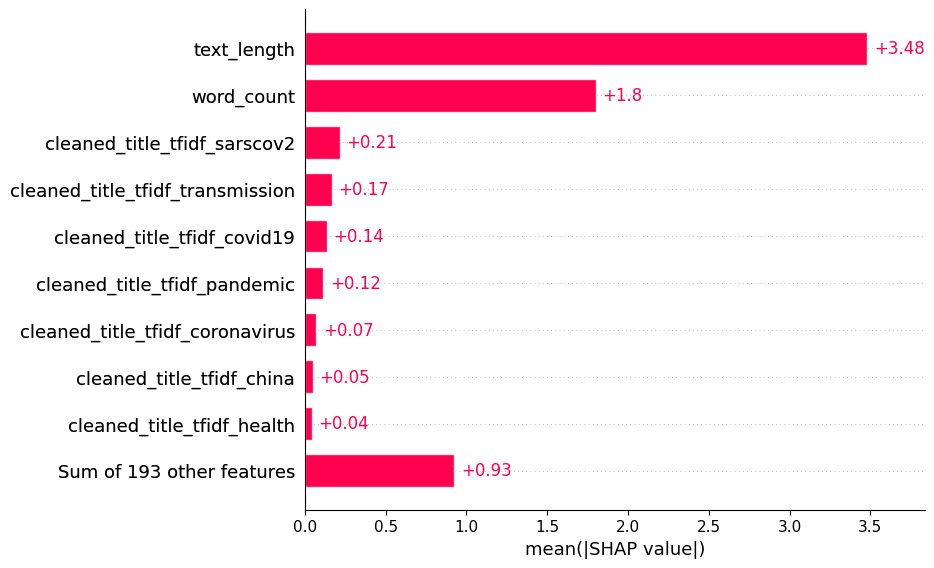

In [52]:
shap.plots.bar(shap_values)

## For a particular instance

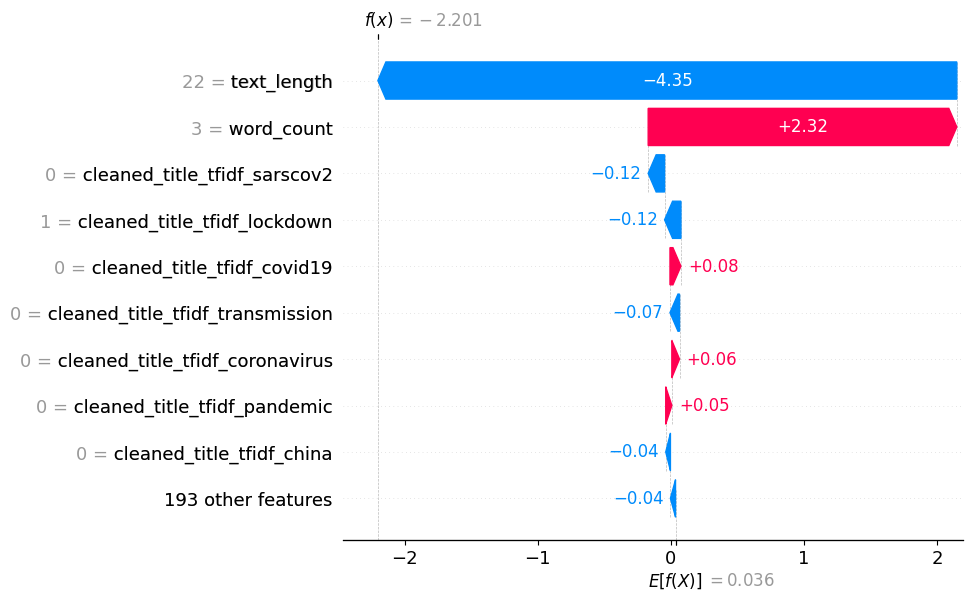

In [50]:
shap.plots.waterfall(shap_values[0])